In [6]:
# imports

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Function Definitions:

def print_accuracy(actual,predicted):
    match=0
    for i in range(0,len(actual)):
        if actual[i]==predicted[i]:
            match+=1
    accuracy=match/len(actual)
    print("matches= ",match,"/",len(actual)," accuracy= ",round(accuracy,2))

def print_accuracies(actual,predicted):
    match=0
    for i in range(0,len(actual)):
        if actual[i]==predicted[i]:
            match+=1
    accuracy=match/len(actual)
    return accuracy

def train_and_evaluate(model):
    kf = KFold(n_splits=5,shuffle=True,random_state=None)
    i=1
    train_accuracies=[]
    test_accuracies=[]
    for train_index, test_index in kf.split(feature_array):
        X_train, X_test = feature_array[train_index], feature_array[test_index]
        y_train, y_test = target_label[train_index], target_label[test_index]
        
        model.fit(X_train, y_train)
        
        train_predictions=model.predict(X_train)
        test_predictions=model.predict(X_test)
        
        train_accuracy=print_accuracies(y_train,train_predictions)
        train_accuracies.append(train_accuracy)
        test_accuracy=print_accuracies(y_test,test_predictions)
        test_accuracies.append(test_accuracy)
        
        print("\nFold",i,": Train accuracy= ",round(train_accuracy,2)," Test accuracy= ",round(test_accuracy,2))
        i+=1
    
    print("\nAvg train accuracy= ",round(np.array(train_accuracies).mean(),2))
    print("Avg test accuracy= ",round(np.array(test_accuracies).mean(),2))

# Data exploration and feature engineering

## Attributes
Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [8]:
dataframe=pd.read_csv("heart.csv")
dataframe.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
dataframe.shape

(918, 12)

In [6]:
# checking the ratios for categorical features.
dataframe['HeartDisease'].value_counts()     # there is no issue of class imbalance

1    508
0    410
Name: HeartDisease, dtype: int64

In [7]:
dataframe['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [8]:
dataframe['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [9]:
dataframe['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [9]:
dataframe['RestingBP'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
113      1
117      1
127      1
129      1
0        1
Name: RestingBP, Length: 67, dtype: int64

In [11]:
dataframe['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

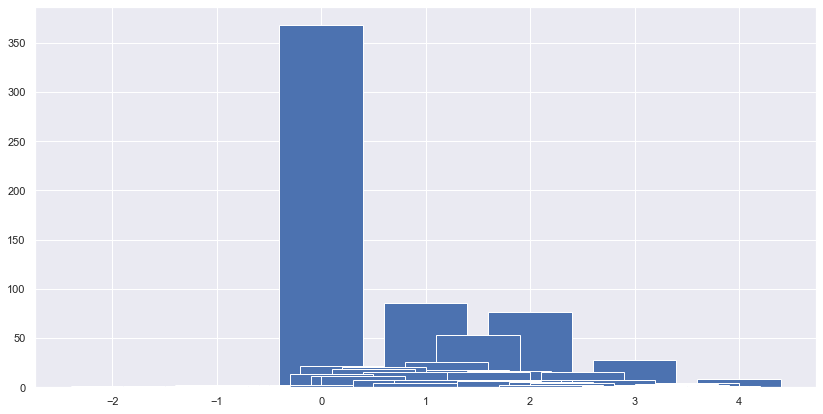

In [264]:
Age_distribution=test_df['Oldpeak'].value_counts()
# Age_distribution=df_trans['Age_log'].value_counts()
x=Age_distribution.index
y=Age_distribution.values
plt.figure(figsize=(14,7))
plt.bar(x,y)

#plt.savefig("plot Age before log.jpg")
plt.show()

<AxesSubplot:xlabel='Oldpeak', ylabel='Density'>

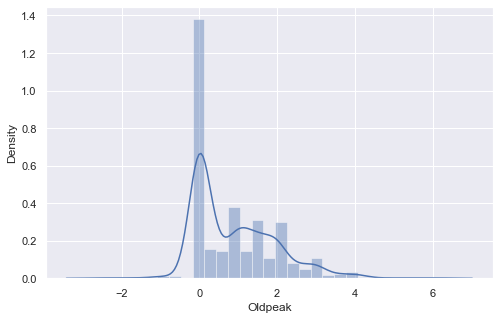

In [77]:
sns.set(rc={'figure.figsize':(8,5)})
#sns.boxplot(test_df['Oldpeak'])
#plt.hist(dataframe['Age'])
sns.distplot(dataframe['Oldpeak'])

In [85]:
print(dataframe.loc[dataframe['Sex'] == 'M']['HeartDisease'].value_counts())
print(dataframe.loc[dataframe['Sex'] == 'F']['HeartDisease'].value_counts())

1    458
0    267
Name: HeartDisease, dtype: int64
0    143
1     50
Name: HeartDisease, dtype: int64


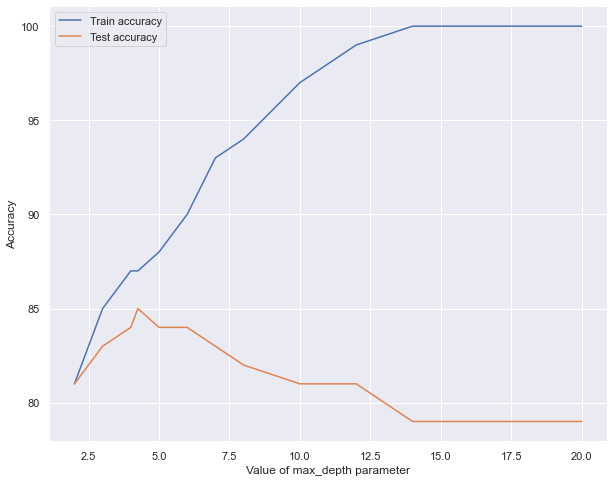

In [153]:
x=[2,3,4,4.25,5,6,7,8,10,12,14,20]
y=[81,85,87,87,88,90,93,94,97,99,100,100]
z=[81,83,84,85,84,84,83,82,81,81,79,79]
plt.figure(figsize=(10,8))
plt.plot(x,y)
plt.plot(x,z)
plt.xlabel("Value of max_depth parameter")
plt.ylabel("Accuracy")
plt.legend(['Train accuracy','Test accuracy'])
#plt.savefig("accuracy vs Max_depth in DT.jpg")
plt.show()

# Feature Engineering

In [69]:
# Checking null values: Imputation
dataframe.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [388]:
# log transform
df_trans=dataframe_new.copy()
df_trans['Age_log'] = np.log(df_trans['Age'])
df_trans.drop('Age', axis=1, inplace=True)
df_trans.head()

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_log
0,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,3.688879
1,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,3.891820
2,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,3.610918
3,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0,3.871201
4,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,3.988984


In [487]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
test_df2=test_df.copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(test_df2)
print(scaled[1])
feature_array=scaled

[0.42857143 0.82926829 0.29320988 0.         0.67605634 0.5
 1.         0.         0.         0.         1.         0.
 0.         1.         0.         1.         0.         0.
 1.         0.        ]


In [13]:
# Removing outliers

test_df=dataframe_new.copy()
test_df['Cholesterol'] = test_df['Cholesterol'].mask(test_df['Cholesterol'] < 1, 237)
test_df['Cholesterol'] = test_df['Cholesterol'].mask(test_df['Cholesterol'] > 410, 237)
test_df['RestingBP'] = test_df['RestingBP'].mask(test_df['RestingBP'] < 85, 130)
test_df['RestingBP'] = test_df['RestingBP'].mask(test_df['RestingBP'] > 175, 130)
test_df['Oldpeak'] = test_df['Oldpeak'].mask(test_df['Oldpeak'] < -2, 0.6)
test_df['Oldpeak'] = test_df['Oldpeak'].mask(test_df['Oldpeak'] > 4, 0.6)
test_df.shape

(918, 20)

In [239]:
# Removing less important features:
test_df1=test_df.copy()
flist=['Sex_F','RestingBP','Sex_M','ChestPainType_ATA','FastingBS','ChestPainType_NAP','RestingECG_LVH','ST_Slope_Down','RestingECG_Normal','ChestPainType_TA','RestingECG_ST']
test_df1.drop(flist, axis=1, inplace=True)
test_df1.shape

(918, 9)

# Creating dummies/OHVs and Feature/Target arrays.

In [12]:
# creating one hot dummies for categorical features:

features = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']
dataframe_new= pd.get_dummies(dataframe[features])
dataframe_new.shape

(918, 20)

In [14]:
# feature_array
feature_array = np.array(test_df)
feature_array.shape

(918, 20)

In [15]:
# target array
target_label=np.array(dataframe[['HeartDisease']])
target_label.shape

(918, 1)

In [16]:
# train-test split
from sklearn.model_selection import train_test_split
train_feature_array, test_feature_array, train_labels, test_labels = train_test_split(feature_array, target_label, test_size = 0.25, shuffle=True)

# Classification using a Support Vector Machine

In [114]:
from sklearn.svm import SVC  
# clf = SVC(kernel='linear')   we can also try kernel="rbf" 
clf = SVC(kernel='linear',C=1,random_state=42)    #clf = svm.SVC(kernel='linear', C=1, random_state=42)
clf

SVC(C=1, kernel='linear', random_state=42)

In [115]:
# train and evaluate using 5 fold cross validation.
train_and_evaluate(clf)


Fold 1 : Train accuracy=  0.87  Test accuracy=  0.86

Fold 2 : Train accuracy=  0.87  Test accuracy=  0.84

Fold 3 : Train accuracy=  0.87  Test accuracy=  0.87

Fold 4 : Train accuracy=  0.86  Test accuracy=  0.87

Fold 5 : Train accuracy=  0.87  Test accuracy=  0.85

Avg train accuracy=  0.87
Avg test accuracy=  0.86


In [105]:
# train and test without 5 fold cross validation.
clf.fit(train_feature_array, train_labels)

SVC(C=25, kernel='linear', random_state=42)

In [106]:
train_predictions=clf.predict(train_feature_array)
test_predictions=clf.predict(test_feature_array)

In [107]:
print("Train: ",end="")
print_accuracy(train_labels,train_predictions)
print("Test: ",end="")
print_accuracy(test_labels,test_predictions)

Train: matches=  593 / 688  accuracy=  0.86
Test: matches=  199 / 230  accuracy=  0.87


# Using Random Forest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier
# rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=5)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=1)  # 39,8.5
rf_clf

RandomForestClassifier(max_depth=25, random_state=1)

In [101]:
# train and evaluate using 5 fold cross validation.
train_and_evaluate(rf_clf)


Fold 1 : Train accuracy=  1.0  Test accuracy=  0.84

Fold 2 : Train accuracy=  1.0  Test accuracy=  0.82

Fold 3 : Train accuracy=  1.0  Test accuracy=  0.9

Fold 4 : Train accuracy=  1.0  Test accuracy=  0.89

Fold 5 : Train accuracy=  1.0  Test accuracy=  0.91

Avg train accuracy=  1.0
Avg test accuracy=  0.87


In [59]:
rf_clf.fit(train_feature_array, train_labels)

RandomForestClassifier(max_depth=8.5, n_estimators=39)

In [85]:
train_predictions=rf_clf.predict(train_feature_array)
test_predictions=rf_clf.predict(test_feature_array)

In [86]:
print("Train: ",end="")
print_accuracy(train_labels,train_predictions)
print("Test: ",end="")
print_accuracy(test_labels,test_predictions)

Train: matches=  654 / 688  accuracy=  0.95
Test: matches=  214 / 230  accuracy=  0.93


In [87]:
rf_clf.predict_proba(test_feature_array)[:10]

array([[0.14130084, 0.85869916],
       [0.05441024, 0.94558976],
       [0.04282917, 0.95717083],
       [0.96340931, 0.03659069],
       [0.11716195, 0.88283805],
       [0.97956005, 0.02043995],
       [0.89177859, 0.10822141],
       [0.12207694, 0.87792306],
       [0.18279515, 0.81720485],
       [0.0668859 , 0.9331141 ]])

# Using Decision Tree Classifier

In [150]:
from sklearn import tree
dt_clf=tree.DecisionTreeClassifier(max_depth=4.25,random_state=None,splitter='random')  #max_depth=4.25
dt_clf

DecisionTreeClassifier(max_depth=4.25, splitter='random')

In [151]:
# train and evaluate using 5 fold cross validation.
train_and_evaluate(dt_clf)


Fold 1 : Train accuracy=  0.87  Test accuracy=  0.85

Fold 2 : Train accuracy=  0.86  Test accuracy=  0.82

Fold 3 : Train accuracy=  0.87  Test accuracy=  0.86

Fold 4 : Train accuracy=  0.87  Test accuracy=  0.85

Fold 5 : Train accuracy=  0.87  Test accuracy=  0.85

Avg train accuracy=  0.87
Avg test accuracy=  0.85


In [442]:
dt_clf.fit(train_feature_array, train_labels)

DecisionTreeClassifier()

In [444]:
train_predictions=dt_clf.predict(train_feature_array)
test_predictions=dt_clf.predict(test_feature_array)

In [445]:
print("Train: ",end="")
print_accuracy(train_labels,train_predictions)
print("Test: ",end="")
print_accuracy(test_labels,test_predictions)

Train: matches=  1377 / 1377  accuracy=  1.0
Test: matches=  439 / 459  accuracy=  0.96


# Using Logistic Regression Classifier

In [256]:
# Can be used because it is a binary classification task.

from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=0)
lr_clf

LogisticRegression(random_state=0)

In [257]:
# train and evaluate using 5 fold cross validation.
train_and_evaluate(lr_clf)


Fold 1 : Train accuracy=  0.84  Test accuracy=  0.84

Fold 2 : Train accuracy=  0.85  Test accuracy=  0.83

Fold 3 : Train accuracy=  0.84  Test accuracy=  0.85

Fold 4 : Train accuracy=  0.84  Test accuracy=  0.87

Fold 5 : Train accuracy=  0.85  Test accuracy=  0.83

Avg train accuracy=  0.85
Avg test accuracy=  0.84


In [217]:
lr_clf.fit(train_feature_array, train_labels)

LogisticRegression(random_state=0)

In [218]:
train_predictions=lr_clf.predict(train_feature_array)
test_predictions=lr_clf.predict(test_feature_array)

In [219]:
print("Train: ",end="")
print_accuracy(train_labels,train_predictions)
print("Test: ",end="")
print_accuracy(test_labels,test_predictions)

Train: matches=  599 / 688  accuracy=  0.87
Test: matches=  193 / 230  accuracy=  0.84


In [317]:
lr_clf.predict_proba(test_feature_array)[:10]

array([[0.76449137, 0.23550863],
       [0.14644929, 0.85355071],
       [0.39009606, 0.60990394],
       [0.89265692, 0.10734308],
       [0.93657232, 0.06342768],
       [0.08624895, 0.91375105],
       [0.24561614, 0.75438386],
       [0.37065069, 0.62934931],
       [0.01184228, 0.98815772],
       [0.19339681, 0.80660319]])

# KNN

In [490]:
# we need to play with the value of k.

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=10)  # initially 15
knn_clf

KNeighborsClassifier(n_neighbors=10)

In [491]:
# train and evaluate using 5 fold cross validation.
train_and_evaluate(knn_clf)


Fold 1 : Train accuracy=  0.86  Test accuracy=  0.88

Fold 2 : Train accuracy=  0.87  Test accuracy=  0.83

Fold 3 : Train accuracy=  0.86  Test accuracy=  0.87

Fold 4 : Train accuracy=  0.87  Test accuracy=  0.86

Fold 5 : Train accuracy=  0.87  Test accuracy=  0.82

Avg train accuracy=  0.87
Avg test accuracy=  0.85


In [453]:
knn_clf.fit(train_feature_array, train_labels)

KNeighborsClassifier(n_neighbors=10)

In [454]:
train_predictions=knn_clf.predict(train_feature_array)
test_predictions=knn_clf.predict(test_feature_array)

In [455]:
print("Train: ",end="")
print_accuracy(train_labels,train_predictions)
print("Test: ",end="")
print_accuracy(test_labels,test_predictions)

Train: matches=  1075 / 1377  accuracy=  0.78
Test: matches=  341 / 459  accuracy=  0.74


In [324]:
print('Train accuracy %s' % knn_clf.score(train_feature_array, train_labels))
print('Test accuracy %s' % knn_clf.score(test_feature_array, test_labels)) 

Train accuracy 0.7558139534883721
Test accuracy 0.691304347826087


In [325]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Test accuracy %s' % accuracy_score(test_labels,test_predictions))
print(confusion_matrix(test_labels,test_predictions)) 
print(classification_report(test_labels,test_predictions)) 

Test accuracy 0.691304347826087
[[76 30]
 [41 83]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.68       106
           1       0.73      0.67      0.70       124

    accuracy                           0.69       230
   macro avg       0.69      0.69      0.69       230
weighted avg       0.70      0.69      0.69       230



# XGBoost

In [19]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [20]:
# train and evaluate using 5 fold cross validation.
train_and_evaluate(xgb_clf)

[11:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Fold 1 : Train accuracy=  1.0  Test accuracy=  0.88
[11:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Fold 2 : Train accuracy=  1.0  Test accuracy=  0.85
[11:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'

In [21]:
xgb_clf.fit(train_feature_array, train_labels)

[11:29:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
train_predictions=xgb_clf.predict(train_feature_array)
test_predictions=xgb_clf.predict(test_feature_array)

In [23]:
print("Train: ",end="")
print_accuracy(train_labels,train_predictions)
print("Test: ",end="")
print_accuracy(test_labels,test_predictions)

Train: matches=  688 / 688  accuracy=  1.0
Test: matches=  193 / 230  accuracy=  0.84


In [54]:
xgb_clf.predict_proba(test_feature_array)[:10]

array([[6.1936378e-03, 9.9380636e-01],
       [4.0006638e-02, 9.5999336e-01],
       [1.6427636e-03, 9.9835724e-01],
       [9.6716893e-01, 3.2831080e-02],
       [1.8374741e-02, 9.8162526e-01],
       [9.9996793e-01, 3.2068390e-05],
       [9.4905287e-01, 5.0947115e-02],
       [2.7177215e-02, 9.7282279e-01],
       [1.4932096e-02, 9.8506790e-01],
       [5.0407052e-02, 9.4959295e-01]], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

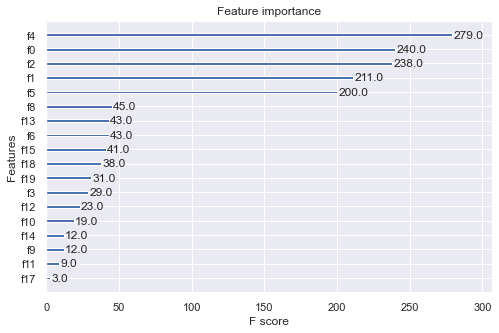

In [213]:
from xgboost import plot_importance
plot_importance(xgb_clf)

# Optuna

In [381]:
import optuna

In [ ]:
def objective(trial):
    #n_estimators = trial.suggest_int('n_estimators', 1, 50)
    #max_depth = int(trial.suggest_loguniform('max_depth', 1, 30))
    
    #kernel = trial.suggest_categorical('kernel',['linear','rbf','poly','sigmoid','precomputed'])
    #C = trial.suggest_int('C', 0, 5)
    #degree = trial.suggest_int('degree', 1, 25)
    
    #solver = trial.suggest_categorical('solver',['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    
    n_neighbors = trial.suggest_int('n_neighbors', 1, 100)
    weights = trial.suggest_categorical('weights',['uniform','distance'])
    algorithm = trial.suggest_categorical('algorithm',['auto','ball_tree','kd_tree','brute'])
    
#     n_estimators = trial.suggest_int('n_estimators', 1, 100)
#     max_depth = int(trial.suggest_loguniform('max_depth', 1, 30))
#     #learning_rate = trial.suggest_float('learning_rate', 0, 1)
#     booster = trial.suggest_categorical('booster',['gbtree', 'gblinear', 'dart'])
#     tree_method = trial.suggest_categorical('tree_method',['exact', 'approx', 'hist'])
#     n_jobs = trial.suggest_int('n_jobs', 1, 10)
    
    #rf_cls = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=5)
    #dt_cls = tree.DecisionTreeClassifier(max_depth=max_depth,random_state=None,splitter='random')
    #cls = SVC(kernel=kernel, C=C, degree=degree, random_state=None)
    #lr_cls = LogisticRegression(solver=solver, random_state=None)
    knn_cls = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm)
    #xgb_cls = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, booster=booster, tree_method=tree_method, n_jobs=n_jobs)
    return tnv(knn_cls)

In [417]:
def tnv(model):
    kf = KFold(n_splits=5,shuffle=True,random_state=None)
    i=1
    train_accuracies=[]
    test_accuracies=[]
    for train_index, test_index in kf.split(feature_array):
        X_train, X_test = feature_array[train_index], feature_array[test_index]
        y_train, y_test = target_label[train_index], target_label[test_index]
        
        model.fit(X_train, y_train)
        
        train_predictions=model.predict(X_train)
        test_predictions=model.predict(X_test)
        
        train_accuracy=print_accuracies(y_train,train_predictions)
        train_accuracies.append(train_accuracy)
        test_accuracy=print_accuracies(y_test,test_predictions)
        test_accuracies.append(test_accuracy)
        i+=1
    
    #return round(np.array(train_accuracies).mean(),2)
    return round(np.array(test_accuracies).mean(),2)

In [513]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=300)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2021-11-20 22:44:27,384] A new study created in memory with name: no-name-778b4cc2-335d-4820-99e1-0d42116817b1
[I 2021-11-20 22:44:27,692] Trial 0 finished with value: 0.86 and parameters: {'n_neighbors': 88, 'weights': 'uniform', 'algorithm': 'auto'}. Best is trial 0 with value: 0.86.
[I 2021-11-20 22:44:27,950] Trial 1 finished with value: 0.86 and parameters: {'n_neighbors': 53, 'weights': 'uniform', 'algorithm': 'brute'}. Best is trial 0 with value: 0.86.
[I 2021-11-20 22:44:28,264] Trial 2 finished with value: 0.86 and parameters: {'n_neighbors': 78, 'weights': 'uniform', 'algorithm': 'ball_tree'}. Best is trial 0 with value: 0.86.
[I 2021-11-20 22:44:28,424] Trial 3 finished with value: 0.86 and parameters: {'n_neighbors': 65, 'weights': 'distance', 'algorithm': 'auto'}. Best is trial 0 with value: 0.86.
[I 2021-11-20 22:44:28,702] Trial 4 finished with value: 0.86 and parameters: {'n_neighbors': 85, 'weights': 'uniform', 'algorithm': 'brute'}. Best is trial 0 with value: 0.86

[I 2021-11-20 22:44:37,174] Trial 42 finished with value: 0.87 and parameters: {'n_neighbors': 76, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 22 with value: 0.87.
[I 2021-11-20 22:44:37,408] Trial 43 finished with value: 0.86 and parameters: {'n_neighbors': 81, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 22 with value: 0.87.
[I 2021-11-20 22:44:37,615] Trial 44 finished with value: 0.86 and parameters: {'n_neighbors': 75, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 22 with value: 0.87.
[I 2021-11-20 22:44:37,834] Trial 45 finished with value: 0.86 and parameters: {'n_neighbors': 70, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 22 with value: 0.87.
[I 2021-11-20 22:44:38,045] Trial 46 finished with value: 0.87 and parameters: {'n_neighbors': 65, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 22 with value: 0.87.
[I 2021-11-20 22:44:38,244] Trial 47 finished with value: 0.86 and parameters: {

[I 2021-11-20 22:44:45,294] Trial 85 finished with value: 0.86 and parameters: {'n_neighbors': 74, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 22 with value: 0.87.
[I 2021-11-20 22:44:45,662] Trial 86 finished with value: 0.86 and parameters: {'n_neighbors': 80, 'weights': 'uniform', 'algorithm': 'ball_tree'}. Best is trial 22 with value: 0.87.
[I 2021-11-20 22:44:45,822] Trial 87 finished with value: 0.86 and parameters: {'n_neighbors': 78, 'weights': 'distance', 'algorithm': 'auto'}. Best is trial 22 with value: 0.87.
[I 2021-11-20 22:44:45,988] Trial 88 finished with value: 0.86 and parameters: {'n_neighbors': 86, 'weights': 'distance', 'algorithm': 'brute'}. Best is trial 22 with value: 0.87.
[I 2021-11-20 22:44:46,220] Trial 89 finished with value: 0.86 and parameters: {'n_neighbors': 83, 'weights': 'distance', 'algorithm': 'kd_tree'}. Best is trial 22 with value: 0.87.
[I 2021-11-20 22:44:46,382] Trial 90 finished with value: 0.87 and parameters: {'n_neighbors

Number of finished trials: 100
Best trial:
  Value: 0.87
  Params: 
    n_neighbors: 89
    weights: distance
    algorithm: auto


In [392]:
# import plotly
# optuna.visualization.plot_optimization_history(study)
# optuna.visualization.plot_slice(study)

## Demo

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

def predict_heart_disease(reports):
    Age=reports[0][0]
    RestingBP=reports[0][3]
    Cholesterol=reports[0][4]
    FastingBS=reports[0][5]
    MaxHR=reports[0][7]
    Oldpeak=reports[0][9]
    Sex_F=0
    Sex_M=0
    ChestPainType_ASY=0
    ChestPainType_ATA=0
    ChestPainType_NAP=0
    ChestPainType_TA=0
    RestingECG_LVH=0
    RestingECG_Normal=0
    RestingECG_ST=0
    ExerciseAngina_N=0
    ExerciseAngina_Y=0
    ST_Slope_Down=0
    ST_Slope_Flat=0
    ST_Slope_Up=0
    
    if reports[0][1]=='M':
        Sex_M=1
    else:
        Sex_F=1
    
    if reports[0][2]=='ASY':
        ChestPainType_ASY=1
    elif reports[0][2]=='ATA':
        ChestPainType_ATA=1
    elif reports[0][2]=='NAP':
        ChestPainType_NAP=1
    else:
        ChestPainType_TA=1
    
    if reports[0][6]=='LVH':
        RestingECG_LVH=1
    elif reports[0][6]=='Normal':
        RestingECG_Normal=1
    else:
        RestingECG_ST=1
    
    if reports[0][8]=='Y':
        ExerciseAngina_Y=1
    else:
        ExerciseAngina_N=1
    
    if reports[0][10]=='Up':
        ST_Slope_Up=1
    elif reports[0][10]=='Down':
        ST_Slope_Down=1
    else:
        ST_Slope_Flat=1
    
    new_reports=[[Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up]]
    
    df_reports=pd.DataFrame(new_reports,columns=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T'])
    
    demo_feature_array = np.array(df_reports)
    
    rf_clf_loaded = joblib.load('saved_model_rf_clf.pkl')
    
    demo_prediction = rf_clf_loaded.predict(demo_feature_array)
    
    chances_0 = round(rf_clf_loaded.predict_proba(demo_feature_array)[0][0],2)*100
    chances_1 = round(rf_clf_loaded.predict_proba(demo_feature_array)[0][1],2)*100
    
    if demo_prediction[0]==0:
        prediction="The patient does not have a heart disease"
    elif demo_prediction[0]==1:
        prediction="The patient have a heart disease, and the chances are "+str(chances_1)+" %"
    return prediction

In [5]:
# Enter the Values from the test reports of the patient:

Age = 25
Sex = 'F'
ChestPainType = 'TA'
RestingBP = 120
Cholesterol = 150
FastingBS = 0
RestingECG = 'Normal'
MaxHR = 108
ExerciseAngina = 'N'
Oldpeak = 1
ST_Slope = 'Down'

reports = [[Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope]]

prediction = predict_heart_disease(reports)
prediction

'The patient does not have a heart disease'